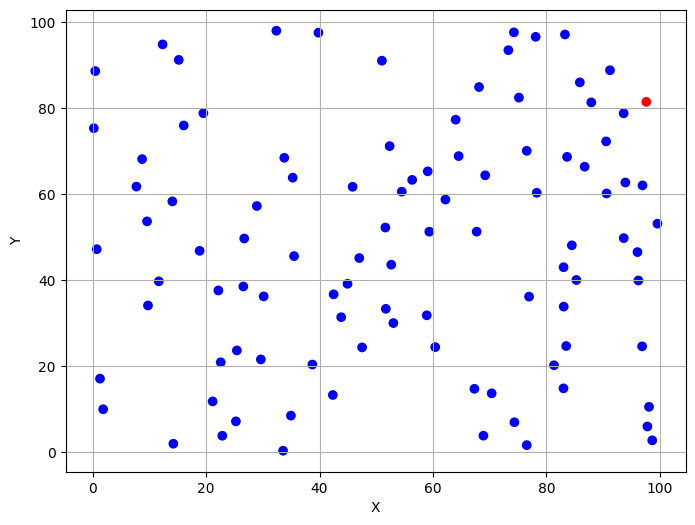

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def generate_random_points(num_points):
    points = []
    while len(points) < num_points:
        x = np.random.uniform(0, 100)
        y = np.random.uniform(0, 100)
        if all(np.sqrt((x - p[0])**2 + (y - p[1])**2) >= 3 for p in points):
            points.append((x, y))
    return points

def save_to_csv(points, filename, red_index):
    df = pd.DataFrame(points, columns=['x', 'y'])
    df['color'] = 'blue'  # Set default color to blue
    df.at[red_index, 'color'] = 'red'  # Set color to red for the red_index point
    df.to_csv(filename, index=False)

def plot_points_with_colors(df):
    x_values = df['x']
    y_values = df['y']
    colors = df['color']
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, color=colors)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

points = generate_random_points(100)
red_index = np.random.randint(len(points))
save_to_csv(points, 'random_points.csv', red_index)
df = pd.read_csv('random_points.csv')
plot_points_with_colors(df)

#4d991a
#788e0b
#9f8004
#c06c00
#de4f01
#ff0000


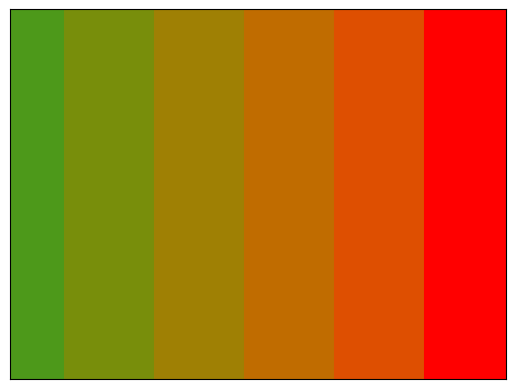

In [9]:
from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
import numpy as np
import matplotlib.pyplot as plt

start_color = sRGBColor(0.3, 0.6, 0.1)  # Green
end_color = sRGBColor(1, 0, 0)    # Red

start_lab = convert_color(start_color, LabColor)
end_lab = convert_color(end_color, LabColor)

num_intermediate_colors = 4
intermediate_colors = []
intermediate_colors.append(start_color)
for i in range(1, num_intermediate_colors + 1):
    lab_l = start_lab.lab_l + (end_lab.lab_l - start_lab.lab_l) * i / (num_intermediate_colors + 1)
    lab_a = start_lab.lab_a + (end_lab.lab_a - start_lab.lab_a) * i / (num_intermediate_colors + 1)
    lab_b = start_lab.lab_b + (end_lab.lab_b - start_lab.lab_b) * i / (num_intermediate_colors + 1)
    lab_color = LabColor(lab_l, lab_a, lab_b)
    intermediate_colors.append(convert_color(lab_color, sRGBColor))
intermediate_colors.append(end_color)

for i, color in enumerate(intermediate_colors):
    print(color.get_rgb_hex())
    plt.axvline(i, color=color.get_rgb_hex(), linewidth=85)
plt.xticks([])
plt.yticks([])
plt.show()